# Principal Component Analysis

The pixel values of a $512 \times 512$ greyscale image of The Old Police House in Hyde Park, London are provided in the data file $\texttt{pca.csv}$. (Each value is normalised between $0$ and $1$.)

I will: apply principal component analysis to the image by treating its rows or columns as samples in $\mathbb{R}^{512}$; reconstruct the image from the $q$ highest principal components for a few choices of $q$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Load the pixel values
pixel_values = np.loadtxt('data/pca.csv', delimiter=',')

# Initialise PCA with 512 components
pca = PCA(n_components=512)

# Fit PCA to the pixel values treating rows as samples
pca = pca.fit(pixel_values)

In [2]:
def reconstruct_pixel_values(q):
    '''Function to reconstruct the image from the q highest principal components.'''
    # Define x, mu and U_q as presented in the lecture notes
    # NNOTE: As opposed to handling sample vectors individually, define x and z as
    # matrices where columns correspond to samples. Since we are treating rows as
    # samples, x is the transpose of pixel_values.
    x = pixel_values.T
    mu = np.mean(x, axis=1).reshape(-1, 1)
    U_q = pca.components_[:q].T

    # Calculate z using the equation in the lecture notes: z_i = U_q^T ( x_i - mu )
    z = U_q.T @ (x - mu)
    
    # Reconstruct x using the equation in the lecture notes: \hat{x}_i = mu + U_q z_i
    reconstructed_x = mu + U_q @ z
    
    # Reconstruct pixel_values by taking the transpose of reconstructed_x
    return reconstructed_x.T

In [3]:
def plot_reconstructed_image(q):
    '''Function to plot the original image and reconstructed image from the q highest principal components.'''
    reconstructed_pixel_values = reconstruct_pixel_values(q)

    plt.figure()
    # Plot original image
    plt.subplot(1, 2, 1)
    plt.imshow(pixel_values, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    # Plot reconstructed image
    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_pixel_values, cmap='gray')
    plt.title(f'Reconstructed Image ({q} PCs)')
    plt.axis('off')
    
    plt.show()

    # Print the proportion of variance captured by the q highest principal components
    variance_captured = np.sum(pca.explained_variance_ratio_[:q])
    print(f'Proportion of variance captured by the {q} highest principal components: {variance_captured:.2f}')

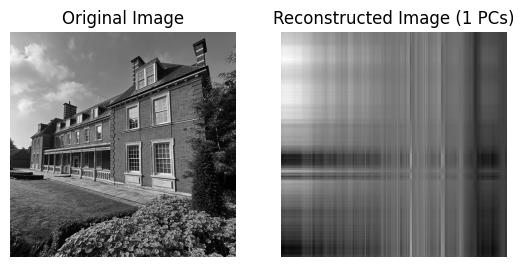

Proportion of variance captured by the 1 highest principal components: 0.31


In [4]:
plot_reconstructed_image(q=1)

The above shows the reconstructed image from the highest principal component alone. In my opinion, this is not an adequate reconstruction: the reconstructed image is unrecognisable to the original.

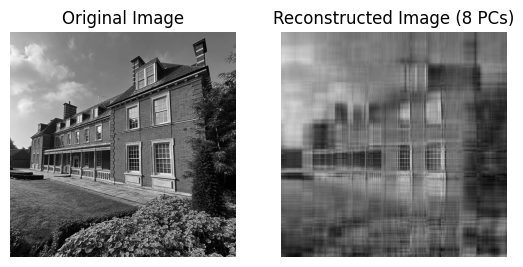

Proportion of variance captured by the 8 highest principal components: 0.62


In [5]:
plot_reconstructed_image(q=8)

The above shows the reconstructed image from the 8 highest principal components. In my opinion, this is an adequate reconstruction if the objective is to recognise the house which is the one main object in the original image.

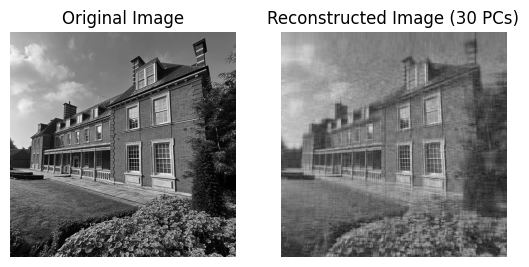

Proportion of variance captured by the 30 highest principal components: 0.79


In [6]:
plot_reconstructed_image(q=30)

The above shows the reconstructed image from the 30 highest principal components. In my opinion, this is an adequate reconstruction if the objective is to recognise the house, grass at the front and foliage at the side which are the three main objects in the original image.

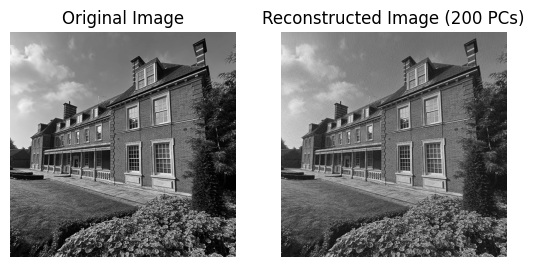

Proportion of variance captured by the 200 highest principal components: 0.99


In [7]:
plot_reconstructed_image(q=200)

The above shows the reconstructed image from the 200 highest principal components. In my opinion, this is an adequate reconstruction if the objective is to reconstruct the original image whilst keeping the vast majority of the details.